### Final Project BDM 2053 - Big Data Algorithms and Statistic 01 

### Shreebatsa Aryal c0859473

#### Project on Prediction of mileage of the cars


### Introduction

The data is technical spec of cars which illustrates the specification of car.

It has snapshots of car’s essential details.

 Car specs typically fall into construction, operation, and performance categories

It illustrates Mileage (miles per gallon) performances of various cars.

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

The dataset is available in https://www.kaggle.com/datasets/uciml/autompg-dataset

#### The description and features of dataset are shown below. The features is also elucidated by analysing  the dataset
##### Attribute Information:

mpg: It is the fuel consumption in miles per gallon which is continuous numerical data.

cylinders: It represents the number of cylinders the car contains. It has multi-valued discrete value.

displacement: It is the distance travelled by the car which is continuous numerical data. 

horsepower: It represents the the power an engine produces. It has continuous numerical data.

weight: It represents the weight of the car. It has continuous numerical data.

acceleration: It is the change in velocity per unit time. It has continuous numerical data.

model year: It represents the model year of the car manufactured. It has multi-valued discrete value.

origin: multi-valued discrete,

car name: It is the name of the car or brand name. It has textual data which is string.

### Key variables

#### Target Variable (Y-value)

mpg	

#### Predictors (X- values)

cylinders	

displacement	

horsepower	

weight	

Acceleration

model year	

Origin

car name

### Data Loading

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import mummify
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
dfauto=pd.read_csv('auto-mpg.csv')
dfauto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
dfauto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
dfauto.shape

(398, 9)

### Data Exploration

## Data Preprocessing

In [5]:
#Field 'car name' has texual data, so since it is in string I am neglecting it
dfauto=dfauto.drop(['car name'], axis=1)
dfauto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
dfauto.isnull().sum()
#There is no any null value in the dataset

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
dfauto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [8]:
#horsepower has datatype as an 'object'.
#So, checking if the column contain any non-numeric data.
dfauto[dfauto['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [9]:
#Capturing the index of the rows which has horsepower = '?'
index_NonNumeric= dfauto[dfauto['horsepower'] == '?'].index.tolist()
index_NonNumeric

[32, 126, 330, 336, 354, 374]

### Imputation on missing values (Median Substitution)

Field ‘horsepower’ has non-numeric value ‘?’ 

The value is replaced by median of the column which is 93.5.

Median Substitution is  done because missing data can create problems for analyzing data.

Thus, replacing the missing data with median substitute value is done to retain most of the data information of the dataset.


In [10]:
dfauto=dfauto.replace('?',np.nan)
dfauto=dfauto.apply(lambda x: x.fillna(x.median()),axis=0)

dfauto.loc[index_NonNumeric]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,93.5,2046,19.0,71,1
126,21.0,6,200.0,93.5,2875,17.0,74,1
330,40.9,4,85.0,93.5,1835,17.3,80,2
336,23.6,4,140.0,93.5,2905,14.3,80,1
354,34.5,4,100.0,93.5,2320,15.8,81,2
374,23.0,4,151.0,93.5,3035,20.5,82,1


### Variable Transformation
Changing datatype of ‘horsepower’ from string to float. This is done because we need numerical value for the calculation of statistical methods

In [11]:
#Though horsepower has continuous value the datatype shown is 'object'
#changing datatype of horsepower from string to float for calculation
dfauto['horsepower'] = dfauto['horsepower'].astype(str).astype(float)
dfauto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### Data Visualization

C:\Users\Arjyel\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of MPG')

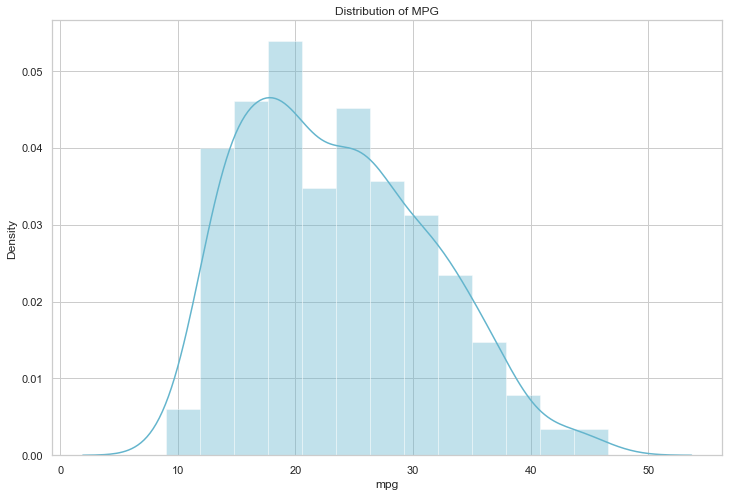

In [12]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(dfauto['mpg'], kde = True, color = 'c')
plt.title('Distribution of MPG')

A skewed distribution occurs when one tail is longer than the other.

The diagram shows the distribution of mpg which is Right skewed distributions.

Such distribution occur when the long tail is on the right side of the distribution. It is also referred as positively skewed.

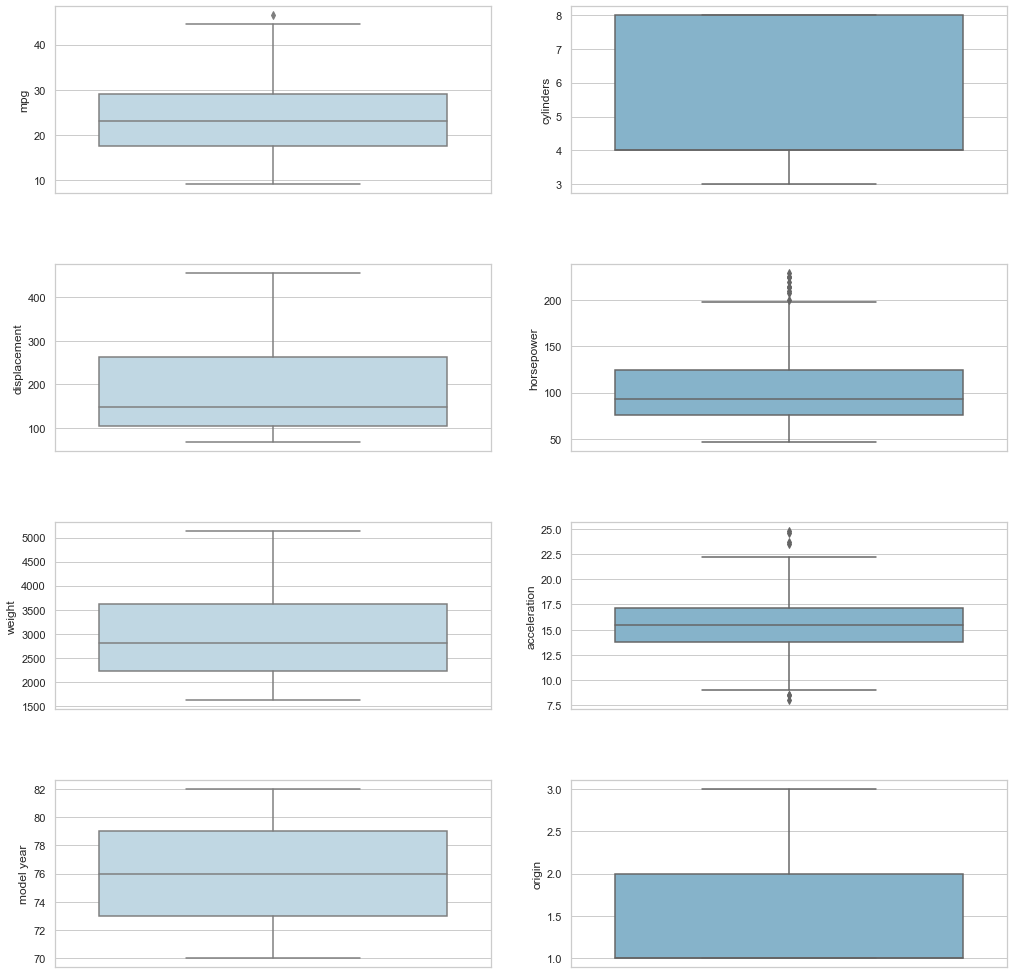

In [13]:
#Box-Plot
def plotBoxplot(data):
    fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15,15))
    fig.tight_layout(pad=4.0)

    col = 0
    row = 0
    colors = ['#bad9e9', '#7ab6d6', '#3c8abd']

    for i, column in enumerate(data.columns):
        sns.boxplot(y=column, data=data, ax=axes[row][col], color=colors[col])

        if (i + 1) % 2 == 0:
            row += 1
            col = 0
        else:
            col += 1
            
plotBoxplot(dfauto)

#### Some outliers are seen on accelaration and horsepower , but they are not too eccentric which could make difference in data distribution. Thus, are taken into consideration and not neglected.

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

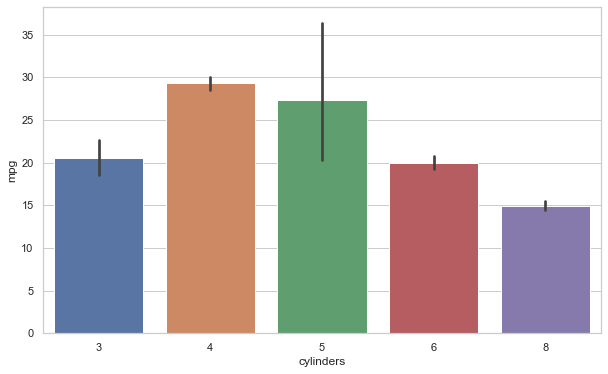

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'cylinders', y = 'mpg', data = dfauto)

##### As number of cylinder increases, mpg decreases. Thus, cylinder has indirect relationship with mpg

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

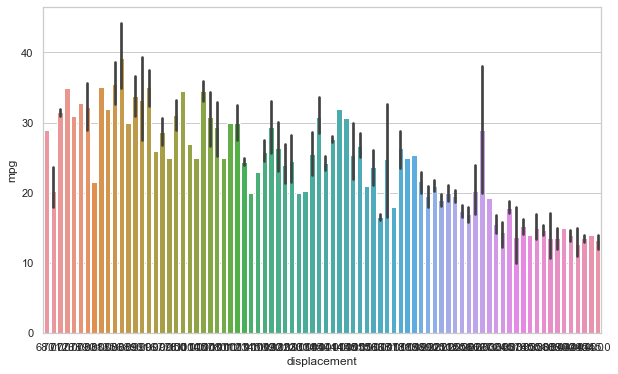

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'displacement', y = 'mpg', data = dfauto)

##### As value of displacement increases, mpg decreases. Thus, displacement has indirect relationship with mpg

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

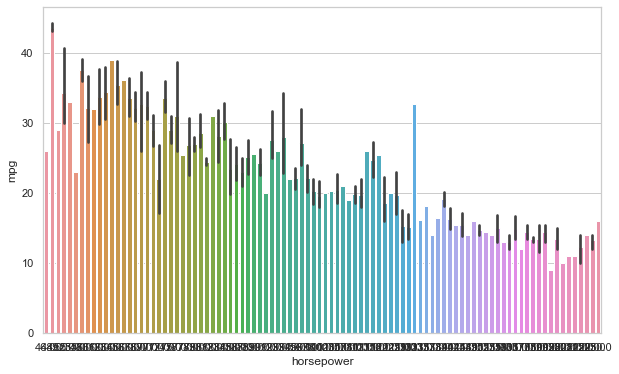

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'horsepower', y = 'mpg', data = dfauto)

##### As value of horsepower increases, mpg decreases. Thus, horsepower has indirect relationship with mpg

<AxesSubplot:xlabel='weight', ylabel='mpg'>

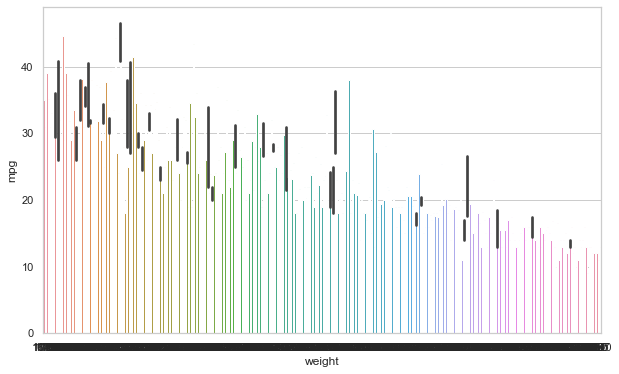

In [17]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'weight', y = 'mpg', data = dfauto)

##### As value of weight increases, mpg decreases. Thus, weight has indirect relationship with mpg

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

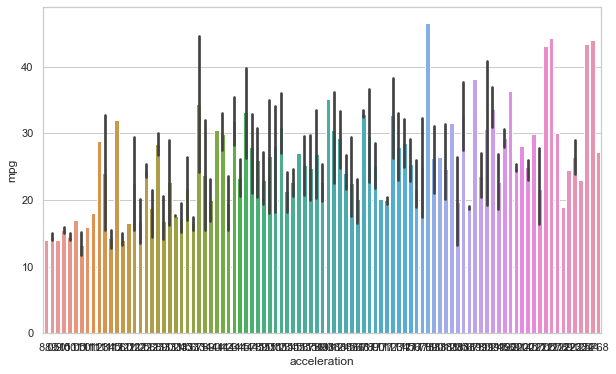

In [18]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'acceleration', y = 'mpg', data = dfauto)

##### There is direct relationship of mpg with acceleration.  As acceleration increases , mpg also increases.


<AxesSubplot:xlabel='model year', ylabel='mpg'>

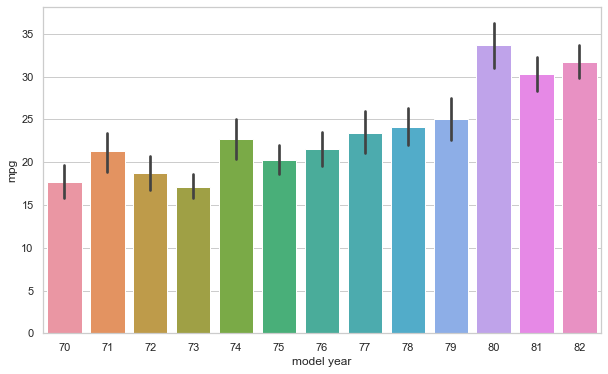

In [19]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'model year', y = 'mpg', data = dfauto)

#### There is direct relationship of mpg with model year. As model year increases , mpg also increases.

<AxesSubplot:xlabel='origin', ylabel='mpg'>

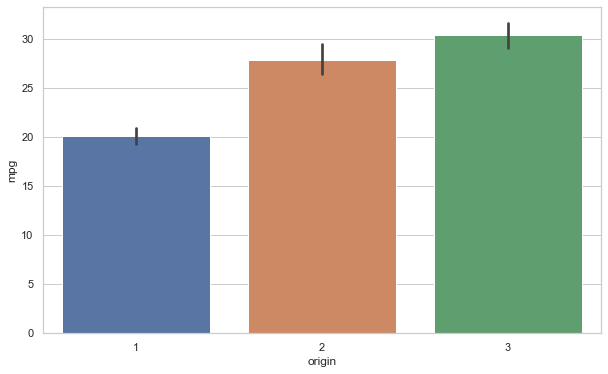

In [20]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'origin', y = 'mpg', data = dfauto)

##### There is direct relationship of mpg with origin. As origin increases , mpg also increases.

## Correlation Matrix

A correlation matrix is a table that shows correlation coefficients between variables.

In the diagram below , each cell shows the correlation between two variables. 

A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.


<AxesSubplot:>

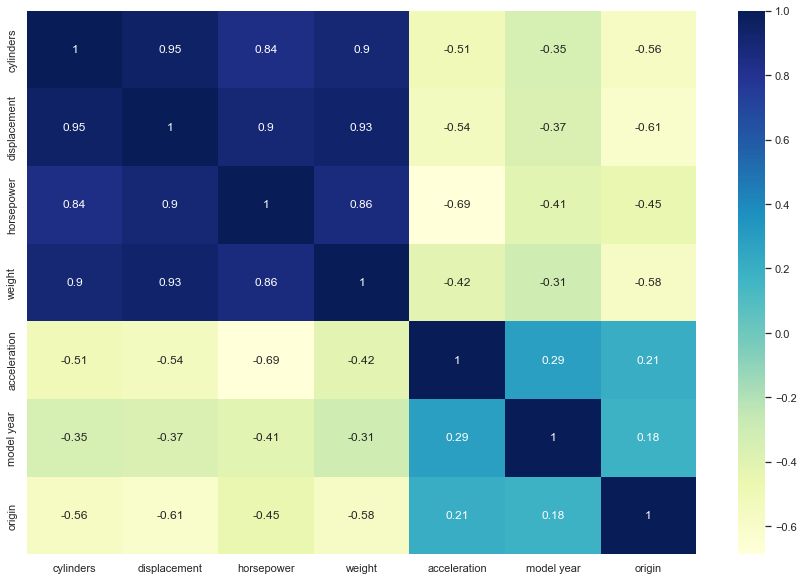

In [21]:
#Heatmap to observe the correlation between the independence  variables
plt.figure(figsize=(15, 10))
sns.heatmap(dfauto.loc[:, dfauto.columns != 'mpg'].corr(), annot=True, cmap='YlGnBu')

 If we see the correlation matrix we can see that cylinders and displacement are highly correlated with the highest value of 0.95,weight and displacement has correlation value of 0.93. If we drop the fields having their correlation value more than 0.9, then curse of dimensionality can be escaped. Since, displacement is common i.e. with both weight and cylinders I am dropping displacement column.

In [22]:
#X and Y split
#Predictors (Independent Variable)
X = dfauto.drop(['mpg','displacement'], axis=1)

#Dependent vairable 
y = dfauto['mpg']

<AxesSubplot:>

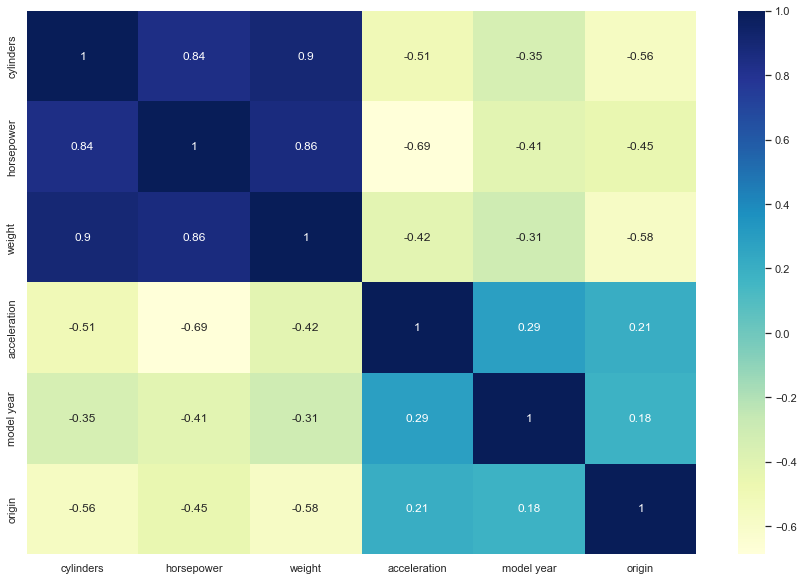

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')

### The Final Remaining Features

#### Target Variable (Y-value): 

Mpg


#### Predictors (X- values):

cylinders	

horsepower	

weight	

Acceleration

model year	

Origin


### Standardization of a dataset

StandardScaler has been used which will standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.

Mean and standard deviation are stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not look like standard normally distributed data.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

## Using PCA

Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. 

This is done by transforming the data into fewer dimensions, which act as summaries of features.

PCA reduces data by geometrically projecting them onto lower dimensions called principal components (PCs), with the goal of finding the best summary of the data using a limited number of PCs.


In [25]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

In [26]:
pca.explained_variance_ratio_

array([0.61148594, 0.15453143, 0.12468393, 0.07765499, 0.02135056,
       0.01029315])

##### It is shown there are 6 total of  Component

Text(0, 0.5, 'Cumulative Explained Variance')

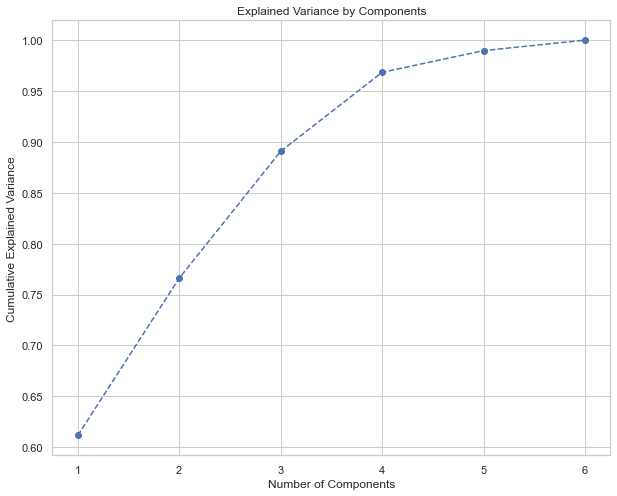

In [27]:
plt.figure(figsize = (10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

##### It is seen that only four component can be taken into consideration which make up to about 95% of cumulative explained variance.


In [28]:
pca1 = PCA(n_components=4)
x=pca1.fit_transform(X)
X = pd.DataFrame(data=x,columns=['PC1','PC2','PC3','PC4'])
X

,PC1,PC2,PC3,PC4
0,2.458499,0.898887,0.558448,-0.423715
1,3.078985,1.033490,0.291333,-0.274644
2,2.803467,1.143924,0.263812,-0.558292
3,2.676113,0.976921,0.463794,-0.368593
4,2.744790,1.194988,0.211261,-0.692055
...,...,...,...,...
393,-0.930608,-1.287413,-0.855508,-0.822127
394,-3.288242,-2.001227,0.703475,1.270056
395,-0.733164,-0.486275,-1.643532,-1.829605
396,-1.490928,-1.766160,-0.221573,-0.357864


### Training and testing dataset split on X and Y for model building
This is a process of supervised learning where we train algorithms that to classify data or predict outcomes accurately.

Train test split is a model validation process which allows to simulate how our model would perform with new data. 

Data is divided into train and test sets. Train set is used for model building and test set is used to validate the performance of the model.

Train data = 80%
Test data = 20%


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Shape of Training data", X_train.shape, y_train.shape)
print("Shape of Testing data", X_test.shape, y_test.shape)

Shape of Training data (318, 4) (318,)
Shape of Testing data (80, 4) (80,)


## Machine Learning Model

Machine learning model are those model which are designed to recognize certain types of pattern. A model can be trained over a set of data, it can be used to apply for the previously unseen data and make predictions about those data.

In this project supervised learning models are used, which  uses a training set to teach models to yield the desired output. Training dataset contains inputs and correct outputs, which allow the model to learn over time. Prediction is made after the model is trained and fitted from training dataset.

Supervised learning can be separated into two types of problems—classification and regression. In this project regression models are used.

Regression Model provides a function with a statistical method which determines  the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

Following models are used in the project:

Lasso Regression Model

Linear Regression Model

Ridge Regression Model

Random Forest Regression Model

### Model Build

In [30]:
from prettytable import PrettyTable
x = PrettyTable()
x1 = PrettyTable()
x.field_names = ["Model", "Train Score", "Test Score", "R2 Score", "Mean Absolute Error", "Mean Squared Error"]
x1.field_names = ["Model", "Maximum Score K-fold Cross Validation"]

### Model 1.  Lasso Regression Model

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

Tuning Lasso Hyperparameters: default hyperparameter of alpha=1.0 is set.


In [31]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0)
# Lasso model fit
model1 =lasso.fit(X_train, y_train)

In [32]:
# Prediction:
y_pred_Lasso = model1.predict(X_test)
y_act = y_test
pd.DataFrame({"Actual_Value": y_act, "Predicted_Value": y_pred_Lasso})

,Actual_Value,Predicted_Value
289,16.9,16.969406
301,34.2,27.221282
147,24.0,27.417681
192,22.0,21.146370
225,17.5,21.488330
...,...,...
196,24.5,28.473176
74,13.0,15.100242
183,25.0,28.107792
274,20.3,25.866491


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Score Calculation
ls_train_score = model1.score(X_train, y_train)
ls_test_score = model1.score(X_test, y_test)
ls_mae = mean_absolute_error(y_act, y_pred_Lasso)
ls_mse = mean_squared_error(y_act, y_pred_Lasso)
ls_r2_score= r2_score(y_act, y_pred_Lasso)
print('Mean Absolute Error is:', ls_mae)
print('Mean Square Error is:',ls_mse)
print('The R2 Score for Lasso Regression Model is:',ls_r2_score)

x.add_row(["Lasso Regression", ls_train_score, ls_test_score,ls_r2_score,  ls_mae, ls_mse])

print(x)

Mean Absolute Error is: 2.695456674921911
Mean Square Error is: 13.136143305111691
The R2 Score for Lasso Regression Model is: 0.7786802728665613
+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|      Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Lasso Regression | 0.7574488867641461 | 0.7786802728665613 | 0.7786802728665613 |  2.695456674921911  | 13.136143305111691 |
+------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


###  K-fold Cross Validation, n is set as 5

In [34]:
c1= cross_val_score(model1,X, y,cv=KFold(n_splits=5,shuffle=True))
print("Score of Lasso Regression Model after Cross Validation:",c1)

x1.add_row(["Lasso Regression", c1.max()])
print(x1)

Score of Lasso Regression Model after Cross Validation: [0.75310832 0.7428883  0.80161603 0.71535889 0.76688749]
+------------------+---------------------------------------+
|      Model       | Maximum Score K-fold Cross Validation |
+------------------+---------------------------------------+
| Lasso Regression |           0.8016160275922506          |
+------------------+---------------------------------------+


### Model 2. Linear Regression Model

A linear regression is a model where the relationship between inputs and outputs is a straight line.

The relationship between a dependent variable y, and one or more than one independent variable x.

The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model2=lr.fit(X_train, y_train)

In [36]:
# Prediction:
y_pred_Linear = model2.predict(X_test)
y_act = y_test
pd.DataFrame({"Actual_Value": y_act, "Predicted_Value": y_pred_Linear})

,Actual_Value,Predicted_Value
289,16.9,16.599981
301,34.2,30.341477
147,24.0,27.756701
192,22.0,21.429955
225,17.5,21.081487
...,...,...
196,24.5,26.812324
74,13.0,12.318013
183,25.0,28.301845
274,20.3,26.347375


In [37]:
#Score Calculation

lr_train_score = model2.score(X_train, y_train)
lr_test_score = model2.score(X_test, y_test)
lr_mae = mean_absolute_error(y_act, y_pred_Linear)
lr_mse = mean_squared_error(y_act, y_pred_Linear)
lr_r2_score= r2_score(y_act, y_pred_Linear)
print('Mean Absolute Error is:', lr_mae)
print('Mean Square Error is:',lr_mse)
print('The R2 Score for Linear Regression Model is:',lr_r2_score)

x.add_row(["Linear Regression", lr_train_score, lr_test_score,lr_r2_score,  lr_mae, lr_mse ])

print(x)

Mean Absolute Error is: 2.4915639869252333
Mean Square Error is: 11.039424364801757
The R2 Score for Linear Regression Model is: 0.814006110364416
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7574488867641461 | 0.7786802728665613 | 0.7786802728665613 |  2.695456674921911  | 13.136143305111691 |
| Linear Regression | 0.7946946202039824 | 0.814006110364416  | 0.814006110364416  |  2.4915639869252333 | 11.039424364801757 |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


### K-fold Cross Validation

In [38]:
c2= cross_val_score(model2,X, y,cv=KFold(n_splits=5,shuffle=True))
print("Score of Linear Regression Model after Cross Validation:",c2)

x1.add_row(["Linear Regression", c2.max()])
print(x1)

Score of Linear Regression Model after Cross Validation: [0.79768457 0.80141986 0.76779653 0.76110934 0.81995874]
+-------------------+---------------------------------------+
|       Model       | Maximum Score K-fold Cross Validation |
+-------------------+---------------------------------------+
|  Lasso Regression |           0.8016160275922506          |
| Linear Regression |           0.8199587421848273          |
+-------------------+---------------------------------------+


### Model 3. Ridge Regression Model

Ridge regression is a supervised learning method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

It is a model tuning method that is used to analyze any data that suffers from multicollinearity.

It shrinks the parameters. Therefore, it is used to prevent multicollinearity

It reduces the model complexity by coefficient shrinkage.

In [39]:
from sklearn.linear_model import Ridge
rd = Ridge()
model3 = rd.fit(X_train, y_train)

# Prediction:
y_pred_ridge = model3.predict(X_test)
y_act = y_test
pd.DataFrame({"Actual_Value": y_act, "Predicted_Value": y_pred_ridge})

,Actual_Value,Predicted_Value
289,16.9,16.604907
301,34.2,30.319482
147,24.0,27.753011
192,22.0,21.429048
225,17.5,21.085092
...,...,...
196,24.5,26.821909
74,13.0,12.339710
183,25.0,28.298898
274,20.3,26.343295


In [40]:
# Scores:
rr_train_score = model3.score(X_train, y_train)
rr_test_score = model3.score(X_test, y_test)
rr_mae = mean_absolute_error(y_act, y_pred_ridge)
rr_mse = mean_squared_error(y_act, y_pred_ridge)
rr_r2_score= r2_score(y_act, y_pred_ridge)
print('Mean Absolute Error is:', rr_mae)
print('Mean Square Error is:',rr_mse)
print('The R2 Score for Ridge Regression Model is:',rr_r2_score)

x.add_row(["Ridge Regression", rr_train_score, rr_test_score,rr_r2_score,  rr_mae, rr_mse ])

print(x)

Mean Absolute Error is: 2.4906183395600534
Mean Square Error is: 11.038022214704926
The R2 Score for Ridge Regression Model is: 0.814029734001097
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7574488867641461 | 0.7786802728665613 | 0.7786802728665613 |  2.695456674921911  | 13.136143305111691 |
| Linear Regression | 0.7946946202039824 | 0.814006110364416  | 0.814006110364416  |  2.4915639869252333 | 11.039424364801757 |
|  Ridge Regression | 0.7946925516478933 | 0.814029734001097  | 0.814029734001097  |  2.4906183395600534 | 11.038022214704926 |
+-------------------+--------------------+--------------------+--------------------+--

### K-Fold Cross Validation

In [41]:
c3= cross_val_score(model3,X, y,cv=KFold(n_splits=5,shuffle=True))
print("Score of Ridge Regression Model after Cross Validation:",c3)

x1.add_row(["Ridge Regression", c3.max()])
print(x1)

Score of Ridge Regression Model after Cross Validation: [0.79741673 0.79013716 0.79905907 0.81859428 0.75769113]
+-------------------+---------------------------------------+
|       Model       | Maximum Score K-fold Cross Validation |
+-------------------+---------------------------------------+
|  Lasso Regression |           0.8016160275922506          |
| Linear Regression |           0.8199587421848273          |
|  Ridge Regression |           0.8185942847705004          |
+-------------------+---------------------------------------+


### Model 4. Random Forest Regression

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression.

It is used to solve a variety of business problems where the company needs to predict a continuous value.

A random forest is a meta estimator that fits several classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [42]:
Rfg = RandomForestRegressor()
model4 = Rfg.fit(X_train, y_train)

# Prediction:
y_pred_rfg = model4.predict(X_test)
y_act = y_test
pd.DataFrame({"Actual_Value": y_act, "Predicted_Value": y_pred_rfg})

,Actual_Value,Predicted_Value
289,16.9,15.846
301,34.2,33.043
147,24.0,26.661
192,22.0,19.268
225,17.5,19.527
...,...,...
196,24.5,29.775
74,13.0,11.960
183,25.0,24.986
274,20.3,22.616


In [43]:
rf_train_score = model4.score(X_train, y_train)
rf_test_score = model4.score(X_test, y_test)
rf_mae = mean_absolute_error(y_act, y_pred_rfg)
rf_mse = mean_squared_error(y_act, y_pred_rfg)
rf_r2_score= r2_score(y_test, y_pred_rfg)
print('Mean Absolute Error is:', rf_mae)
print('Mean Square Error is:',rf_mse)
print('The R2 Score for Random Forest Regression Model is:',rf_r2_score)

x.add_row(["RandomForest", rf_train_score, rf_test_score,rf_r2_score,  rf_mae, rf_mse ])

print(x)

Mean Absolute Error is: 2.0461750000000003
Mean Square Error is: 7.995273949999989
The R2 Score for Random Forest Regression Model is: 0.8652944164911389
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7574488867641461 | 0.7786802728665613 | 0.7786802728665613 |  2.695456674921911  | 13.136143305111691 |
| Linear Regression | 0.7946946202039824 | 0.814006110364416  | 0.814006110364416  |  2.4915639869252333 | 11.039424364801757 |
|  Ridge Regression | 0.7946925516478933 | 0.814029734001097  | 0.814029734001097  |  2.4906183395600534 | 11.038022214704926 |
|    RandomForest   | 0.9798832880990173 | 0.8652944164911389 | 0.865294416491

### K-fold Cross Validation

In [44]:
c4= cross_val_score(model4,X, y,cv=KFold(n_splits=5,shuffle=True))
print("Score of RandomForest Regression Model after Cross Validation:",c4)

x1.add_row(["RandomForest Regression", c4.max()])
print(x1)

Score of RandomForest Regression Model after Cross Validation: [0.83219613 0.85498109 0.87355491 0.83992975 0.83932555]
+-------------------------+---------------------------------------+
|          Model          | Maximum Score K-fold Cross Validation |
+-------------------------+---------------------------------------+
|     Lasso Regression    |           0.8016160275922506          |
|    Linear Regression    |           0.8199587421848273          |
|     Ridge Regression    |           0.8185942847705004          |
| RandomForest Regression |           0.8735549117593974          |
+-------------------------+---------------------------------------+


### Comparison of Scores and Error between models

In [45]:
print(x)

+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|  Lasso Regression | 0.7574488867641461 | 0.7786802728665613 | 0.7786802728665613 |  2.695456674921911  | 13.136143305111691 |
| Linear Regression | 0.7946946202039824 | 0.814006110364416  | 0.814006110364416  |  2.4915639869252333 | 11.039424364801757 |
|  Ridge Regression | 0.7946925516478933 | 0.814029734001097  | 0.814029734001097  |  2.4906183395600534 | 11.038022214704926 |
|    RandomForest   | 0.9798832880990173 | 0.8652944164911389 | 0.8652944164911389 |  2.0461750000000003 | 7.995273949999989  |
+-------------------+--------------------+--------------------+--------------------+--------------------

### K-Fold Cross Validation Comparison Among all the 4 models

K-fold cross validation technique is attempted.

Itis a superior technique for validation of  the performance of our model. 

It evaluates the model using different chunks of the data set as the validation set.

Our data is divided  into K-folds. K represents the number of folds into which we want to split your data. I have selected 5 number of folds in this project.

The data set divides into five sections. In different iterations, one part becomes the validation set and other parts are used for training.

Different chunks of validation and training set are selected over 5 different iteration.

In [46]:
print(x1)

+-------------------------+---------------------------------------+
|          Model          | Maximum Score K-fold Cross Validation |
+-------------------------+---------------------------------------+
|     Lasso Regression    |           0.8016160275922506          |
|    Linear Regression    |           0.8199587421848273          |
|     Ridge Regression    |           0.8185942847705004          |
| RandomForest Regression |           0.8735549117593974          |
+-------------------------+---------------------------------------+


####   It is clear that Random Forest Regression has high mean score of K-Fold Cross Validation (this mean is taken from mean of all 5 score taken as number of split is set 5)

### Plot of  Actual vs Predicted values

#### For Lasso Regression Model Vs Linear Regression Model Vs Ridge Regression Model Vs RandomForest Regression Model

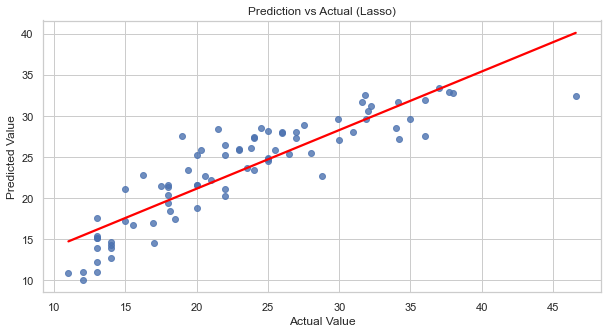

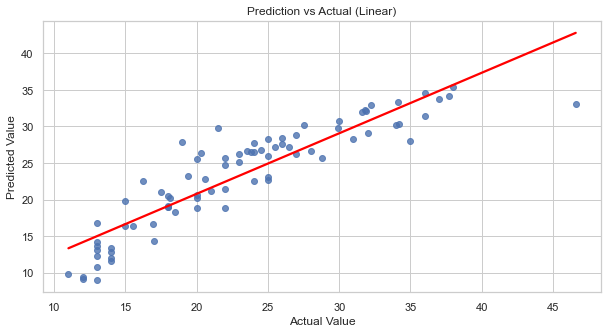

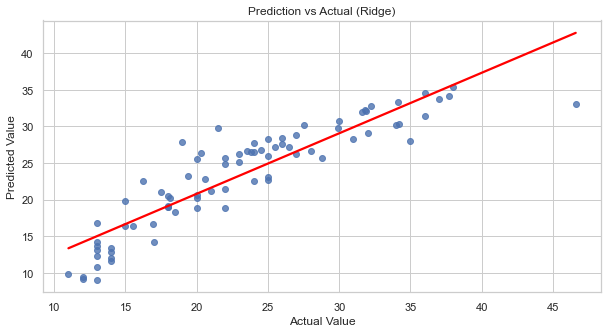

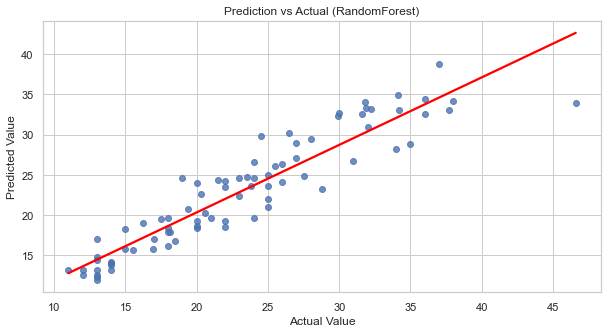

In [47]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_Lasso, line_kws={'color':'red'}, ci=None)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual (Lasso)')

plt.show()
####################################################


warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_Linear, line_kws={'color':'red'}, ci=None)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual (Linear)')

plt.show()
#######################################################


warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_ridge, line_kws={'color':'red'}, ci=None)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual (Ridge)')

plt.show()

#######################################################


warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 5))
sns.regplot(y_test, y_pred_rfg, line_kws={'color':'red'}, ci=None)

plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Prediction vs Actual (RandomForest)')

plt.show()

Among all of the four model used RandomForest Regression Model shows the highest R2 score among all which is 0.8972.

# Conclusion

Four different supervised machine learning regression models are used on the training set of the mpg data, and the predictions from each of the model are also done.

### Mean  Absolute Error

It is seen that Random Forest Regression Model has minimum Mean Absolute Error of 2.04 among all of the models which is good.


### Mean Squared Error

It is seen that Random Forest Regression Model has minimum Mean Squared Error of 7.99 among all of the models which s good.

### Test Score

It is concluded that Random Forest Regression Model perform well than all other model as its test score of around 86%


### Result from R2 Score

It is concluded that Random Forest Regression Model perform well than all other model as its r2 score is around 86% .

### Result from K-fold Cross Validation

After K-fold cross validation is done, it is found that Random Forest Regression Model has highest score of 87% among all of other models

We can say that the mileage can be calculated(or predicted) for the cars when other fundamental information related to the cars are given. So for this, Random Forest Regression Model provides the best predicted value of mpg given the fundamental dimensional factors(cylinders, horsepower, weight, Acceleration, model year, Origin)  of the cars. Thus, comparing all the metrics it can be concluded that Random Forest Regression Model provides the best result for the dataset chosen.